## 参数
gmm = GaussianMixture(n_components=1, covariance_type=‘full’, max_iter=100) 来创建 GMM 聚类：

1.n_components：即高斯混合模型的个数，也就是我们要聚类的个数，默认值为 1。如果你不指定 n_components，最终的聚类结果都会为同一个值。

2.covariance_type：代表协方差类型。一个高斯混合模型的分布是由均值向量和协方差矩阵决定的，所以协方差的类型也代表了不同的高斯混合模型的特征。协方差类型有 4 种取值：covariance_type=full，代表完全协方差，也就是元素都不为 0；covariance_type=tied，代表相同的完全协方差；covariance_type=diag，代表对角协方差，也就是对角不为 0，其余为 0；covariance_type=spherical，代表球面协方差，非对角为 0，对角完全相同，呈现球面的特性。

3.max_iter：代表最大迭代次数，EM 算法是由 E 步和 M 步迭代求得最终的模型参数，这里可以指定最大迭代次数，默认值为 100。

In [6]:
# 1、数据加载
import pandas as pd

data = pd.read_csv('/Users/zhangqihao/Desktop/PYTHON/机器学习/机器学习资料7/heros.csv', encoding = 'gb18030')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Users/zhangqihao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangqihao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangqihao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29983 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangqihao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhangqihao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25104 missing from current font.


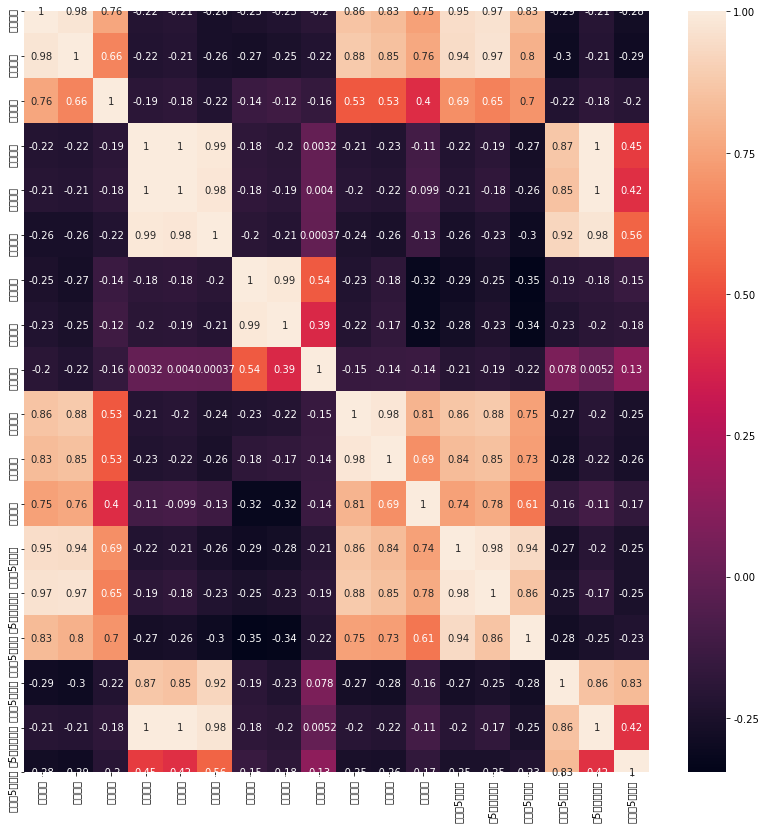

In [11]:
# 2、数据探索
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 plt 正确显示中文
# 用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei'] 
# 用来正常显示负号
plt.rcParams['axes.unicode_minus']=False 

# 用热力图呈现 features_mean 字段之间的相关性
corr = data[features].corr()
plt.figure(figsize=(14,14))
# annot=True 显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

In [15]:
# 3、数据清洗/降维

# 相关性大的属性保留一个，对属性进行降维
features_remain = [u'最大生命', u'初始生命', u'最大法力', 
                   u'最高物攻', u'初始物攻', u'最大物防', 
                   u'初始物防', u'最大每5秒回血', 
                   u'最大每5秒回蓝', u'初始每5秒回蓝', 
                   u'最大攻速', u'攻击范围']

data = data[features_remain]

# 清洗
data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%'))/100)
data[u'攻击范围']=data[u'攻击范围'].map({'远程':1,'近战':0})

In [18]:
# 4、标准化处理
# 采用 Z-Score 规范化数据，保证每个特征维度的数据均值为 0，方差为 1
from sklearn.preprocessing import StandardScaler

transfer = StandardScaler()
data = transfer.fit_transform(data)

In [19]:
# 5、预估器流程
from sklearn.mixture import GaussianMixture

estimator = GaussianMixture(n_components=30, covariance_type='full')
estimator.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=30, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [23]:
# 6、模型评估
from sklearn.metrics import calinski_harabaz_score

y_predict = estimator.predict(data)
print(y_predict)

# 指标分数越高，代表聚类效果越好，也就是相同类中的差异性小，不同类之间的差异性大。
print(calinski_harabaz_score(data, y_predict))

[26  2 10 16  1  1 18 10  5  2 21  2 16 14 23 21 11 16  1  3  7  8  3  8
  8  8  3 22  4 15 14 15 15  4 15 15  4 19  6 25 15  4  4 15  4 25  2  6
  2  4 27 29  1 20 20 26 13  2 28  1 13 12 17 26  9  0  0 24 22]
21.372598194884752


/Users/zhangqihao/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
